<a href="https://colab.research.google.com/github/dustiny5/DS-Unit-2-Sprint-3-Classification-Validation/blob/master/module3-classification-metrics/LS_DS_242_Validate_classification_problems_LIVE_LESSON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science — Model Validation_ 

# Classification Metrics & Imbalanced Classes

#### Objectives
- Classification Metrics: Accuracy, Precision, Recall, F1, ROC AUC
- Confusion Matrix
- Imbalanced Classes

#### Pre-reads
- [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall)
- [Simple guide to confusion matrix terminology](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)
- [ROC curves and Area Under the Curve explained](https://www.dataschool.io/roc-curves-and-auc-explained/)


## Preliminary setup

#### Install [category_encoders](https://github.com/scikit-learn-contrib/categorical-encoding)
- Google Colab: `pip install category_encoders`
- Local, Anaconda: `conda install -c conda-forge category_encoders`

#### Install  [mlxtend](http://rasbt.github.io/mlxtend/) to plot decision regions
- Google Colab: Already installed
- Local, Anaconda: `conda install -c conda-forge mlxtend`

#### Get the Bank Marketing dataset
- Download from [UCI](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)
- Or run this cell:

In [1]:
!pip install category_encoders

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
!unzip bank-additional.zip

--2019-05-08 21:18:11--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444572 (434K) [application/x-httpd-php]
Saving to: ‘bank-additional.zip.1’

bank-additional.zip 100%[===================>] 434.15K  1.28MB/s    in 0.3s    

2019-05-08 21:18:12 (1.28 MB/s) - ‘bank-additional.zip.1’ saved [444572/444572]

Archive:  bank-additional.zip
replace bank-additional/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace bank-additional/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/bank-additional/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace bank-additional/.Rhistory? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace bank-additional/bank-additional-full.csv? [y]es, [n]o, [A]ll

# Classification Metrics & Confusion Matrix — with Bank Marketing dataset

In [0]:
# This code comes from our previous notebook

# Imports
%matplotlib inline
import warnings
import category_encoders as ce
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.exceptions import DataConversionWarning
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Load data
bank = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')

# Assign to X, y
X = bank.drop(columns='y')
y = bank['y'] == 'yes'

# Drop leaky feature
X = X.drop(columns='duration')

# Split Train, Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Make pipeline
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    StandardScaler(), 
    LogisticRegression(solver='lbfgs', max_iter=1000)
)

#### scikit-learn documentation
- [sklearn.linear_model.LogisticRegression.predict_proba](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba)
- [sklearn.metrics.classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
- [sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
- [sklearn.model_selection.cross_val_predict](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html)

In [0]:
from sklearn.model_selection import cross_val_predict

y_pred_proba = cross_val_predict(pipeline, X_train, y_train, cv=3, n_jobs=-1, 
                                 method='predict_proba')[:,1]

#### Change the threshold and re-run this cell

In [5]:
threshold = 0.5
y_pred = y_pred_proba >= threshold
correct = y_pred == y_train

labels = pd.DataFrame({'Ground Truth': y_train, 
                       'Predicted Probability': y_pred_proba, 
                       'Discrete Prediction': y_pred, 
                       'Correct Prediction?': correct})

labels.head(20)

,Ground Truth,Predicted Probability,Discrete Prediction,Correct Prediction?
25611,False,0.047259,False,True
26010,False,0.025392,False,True
40194,True,0.600246,True,True
297,False,0.031742,False,True
36344,False,0.440106,False,True
21806,False,0.065051,False,True
37395,True,0.225595,False,False
25863,False,0.065761,False,True
7393,False,0.026482,False,True
14697,False,0.069068,False,True


#### Change the threshold and re-run this cell

In [6]:
from sklearn.metrics import classification_report, confusion_matrix

threshold = 0.5
y_pred = y_pred_proba >= threshold

print(classification_report(y_train, y_pred))

pd.DataFrame(confusion_matrix(y_train, y_pred), 
             columns=['Predicted Negative', 'Predicted Positive'], 
             index=['Actual Negative', 'Actual Positive'])

              precision    recall  f1-score   support

       False       0.91      0.98      0.95     29238
        True       0.66      0.23      0.34      3712

   micro avg       0.90      0.90      0.90     32950
   macro avg       0.78      0.61      0.64     32950
weighted avg       0.88      0.90      0.88     32950



,Predicted Negative,Predicted Positive
Actual Negative,28786,452
Actual Positive,2852,860


In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred)

0.8997268588770865

In [8]:
#TODO 

true_negative  = 28786
false_positive = 452
false_negative = 2852
true_positive  = 860

actual_negative = 28786 + 452
actual_positive = 2852 + 860

predicted_negative = 28786 + 2852
predicted_positive = 452 + 860

accuracy = (true_positive + true_negative) / (predicted_negative + predicted_positive)
precision = true_positive / predicted_positive
recall = true_positive / actual_positive
f1 = 2 * precision * recall / (precision + recall)

print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1: {f1}')

Accuracy: 0.8997268588770865
Precision: 0.6554878048780488
Recall: 0.23168103448275862
F1: 0.34235668789808915


#### F1 Score
"[The F1 score](https://en.wikipedia.org/wiki/F1_score) is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0."

### ROC AUC (Receiver Operating Characteristic, Area Under the Curve)

#### Scikit-Learn docs
- [User Guide: Receiver operating characteristic (ROC)](https://scikit-learn.org/stable/modules/model_evaluation.html#receiver-operating-characteristic-roc)
- [sklearn.metrics.roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)
- [sklearn.metrics.roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)

#### More links
- [ROC curves and Area Under the Curve explained](https://www.dataschool.io/roc-curves-and-auc-explained/)
- [The philosophical argument for using ROC curves](https://lukeoakdenrayner.wordpress.com/2018/01/07/the-philosophical-argument-for-using-roc-curves/)

[Wikipedia explains,](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) "A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings."

ROC AUC is the area under the ROC curve. [It can be interpreted](https://stats.stackexchange.com/questions/132777/what-does-auc-stand-for-and-what-is-it) as "the expectation that a uniformly drawn random positive is ranked before a uniformly drawn random negative." 

ROC AUC measures how well a classifier ranks predicted probabilities. It ranges from 0 to 1. A naive majority class baseline will have an ROC AUC score of 0.5. 

Area under the Receiver Operating Characteristic curve: 0.7885656855096462


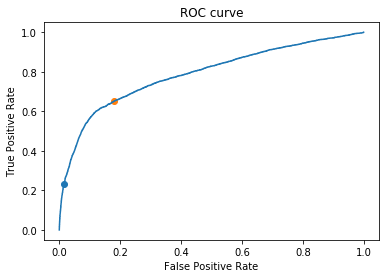

In [9]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y_train, y_pred_proba))
    
# When threshold = 0.5
false_positives = 452
true_positives = 860
false_positive_rate = false_positives/actual_negative
true_positive_rate = true_positives/actual_positive
plt.scatter(false_positive_rate, true_positive_rate)

# When threshold = 0.1
false_positives = 5267
true_positives = 2418
false_positive_rate = false_positives/actual_negative
true_positive_rate = true_positives/actual_positive
plt.scatter(false_positive_rate, true_positive_rate);

In [10]:
#False Positive Rate, True Positive Rate, Thresholds
pd.DataFrame(dict(fpr=fpr, tpr=tpr, thresholds=thresholds))

,fpr,tpr,thresholds
0,0.000000,0.000000,1.903011
1,0.000000,0.000269,0.903011
2,0.000000,0.004849,0.880439
3,0.000034,0.004849,0.879162
4,0.000034,0.008890,0.872156
5,0.000103,0.008890,0.871648
6,0.000103,0.009429,0.870454
7,0.000137,0.009429,0.869912
8,0.000137,0.011584,0.864618
9,0.000171,0.011584,0.864278


# Imbalanced Classes — with synthetic data

## Fun demo!

The next code cell does five things:

#### 1. Generate data

We use scikit-learn's [make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) function to generate fake data for a binary classification problem, based on several parameters, including:
- Number of samples
- Weights, meaning "the proportions of samples assigned to each class."
- Class separation: "Larger values spread out the clusters/classes and make the classification task easier."

(We are generating fake data so it is easy to visualize.)

#### 2. Split data

We split the data three ways, into train, validation, and test sets. (For this toy example, it's not really necessary to do a three-way split. A two-way split, or even no split, would be ok. But I'm trying to demonstrate good habits, even in toy examples, to avoid confusion.)

#### 3. Fit model

We use scikit-learn to fit a [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) on the training data.

We use this model parameter:

> **class_weight : _dict or ‘balanced’, default: None_**

> Weights associated with classes in the form `{class_label: weight}`. If not given, all classes are supposed to have weight one.

> The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as `n_samples / (n_classes * np.bincount(y))`.


#### 4. Evaluate model

We use our Logistic Regression model, which was fit on the training data, to generate predictions for the validation data.

Then we print [scikit-learn's Classification Report](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report), with many metrics, and also the accuracy score. We are comparing the correct labels to the Logistic Regression's predicted labels, for the validation set. 

#### 5. Visualize decision function

Based on these examples
- https://imbalanced-learn.readthedocs.io/en/stable/auto_examples/combine/plot_comparison_combine.html
- http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/#example-1-decision-regions-in-2d

In [0]:
from sklearn.model_selection import train_test_split

def train_validation_test_split(
    X, y, train_size=0.8, val_size=0.1, test_size=0.1, 
    random_state=None, shuffle=True):
        
    assert train_size + val_size + test_size == 1
    
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, shuffle=shuffle)
    
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=val_size/(train_size+val_size), 
        random_state=random_state, shuffle=shuffle)
    
    return X_train, X_val, X_test, y_train, y_val, y_test

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        96
           1       0.36      1.00      0.53         4

   micro avg       0.93      0.93      0.93       100
   macro avg       0.68      0.96      0.75       100
weighted avg       0.97      0.93      0.95       100

accuracy 0.93


,Predicted Negative,Predicted Positive
Actual Negative,89,7
Actual Positive,0,4


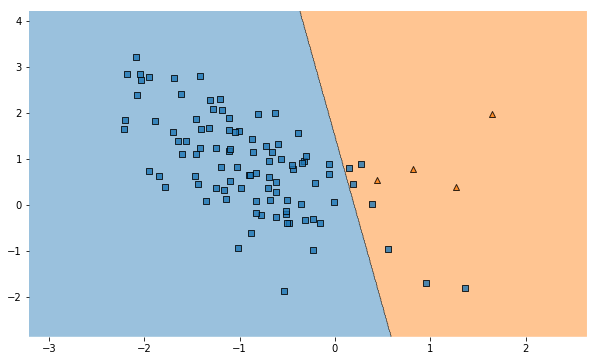

In [32]:
%matplotlib inline
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions


#1. Generate data

# Try re-running the cell with different values for these parameters
n_samples = 1000
weights = (0.95, 0.05)
class_sep = 0.8

X, y = make_classification(n_samples=n_samples, n_features=2, n_informative=2, 
                           n_redundant=0, n_repeated=0, n_classes=2, 
                           n_clusters_per_class=1, weights=weights, 
                           class_sep=class_sep, random_state=0)


# 2. Split data

# Uses our custom train_validation_test_split function
X_train, X_val, X_test, y_train, y_val, y_test = train_validation_test_split(
    X, y, train_size=0.8, val_size=0.1, test_size=0.1, random_state=1)


# 3. Fit model

# Try re-running the cell with different values for this parameter
class_weight = None

model = LogisticRegression(solver='lbfgs', class_weight=class_weight)
model.fit(X_train, y_train)


# 4. Evaluate model

y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))
print('accuracy', accuracy_score(y_val, y_pred))
display(pd.DataFrame(
    confusion_matrix(y_val, y_pred), 
    columns=['Predicted Negative', 'Predicted Positive'], 
    index=['Actual Negative', 'Actual Positive']))


# 5. Visualize decision regions

plt.figure(figsize=(10, 6))
plot_decision_regions(X_val, y_val, model, legend=0);

Try re-running the cell above with different values for these four parameters:
- `n_samples`
- `weights`
- `class_sep`
- `class_balance`

For example, with a 50% / 50% class distribution:
```
n_samples = 1000
weights = (0.50, 0.50)
class_sep = 0.8
class_balance = None
```

With a 95% / 5% class distribution:
```
n_samples = 1000
weights = (0.95, 0.05)
class_sep = 0.8
class_balance = None
```

With the same 95% / 5% class distribution, but changing the Logistic Regression's `class_balance` parameter to `'balanced'` (instead of its default `None`)
```
n_samples = 1000
weights = (0.95, 0.05)
class_sep = 0.8
class_balance = 'balanced'
```

With the same 95% / 5% class distribution, but with different values for `class_balance`:
- `{0: 1, 1: 1}` _(equivalent to `None`)_
- `{0: 1, 1: 2}`
- `{0: 1, 1: 10}` _(roughly equivalent to `'balanced'` for this dataset)_
- `{0: 1, 1: 100}`
- `{0: 1, 1: 10000}`

How do the evaluation metrics and decision region plots change?

## What you can do about imbalanced classes

[Learning from Imbalanced Classes](https://www.svds.com/tbt-learning-imbalanced-classes/) gives "a rough outline of useful approaches" : 

- Do nothing. Sometimes you get lucky and nothing needs to be done. You can train on the so-called natural (or stratified) distribution and sometimes it works without need for modification.
- Balance the training set in some way:
  - Oversample the minority class.
  - Undersample the majority class.
  - Synthesize new minority classes.
- Throw away minority examples and switch to an anomaly detection framework.
- At the algorithm level, or after it:
  - Adjust the class weight (misclassification costs).
  - Adjust the decision threshold.
  - Modify an existing algorithm to be more sensitive to rare classes.
- Construct an entirely new algorithm to perform well on imbalanced data.


#### We demonstrated two of these options: 

- "Adjust the class weight (misclassification costs)" — many scikit-learn classifiers have a `class_balance` parameter
- "Adjust the decision threshold" — you can lean more about this in a great blog post, [Visualizing Machine Learning Thresholds to Make Better Business Decisions](https://blog.insightdatascience.com/visualizing-machine-learning-thresholds-to-make-better-business-decisions-4ab07f823415).

#### Another option to be aware of:
- The [imbalance-learn](https://github.com/scikit-learn-contrib/imbalanced-learn) library can be used to "oversample the minority class, undersample the majority class, or synthesize new minority classes."

# ASSIGNMENT

#### Bank Marketing
- Try the `class_weight` parameter.
- Explore and visualize your data. 
- Wrangle [bad data](https://github.com/Quartz/bad-data-guide), outliers, and missing values.
- Try engineering more features. You can transform, bin, and combine features. 
- Try selecting fewer features.


#### Imbalanced Classes demo with synthetic data
- Play around with the demo. Change parameter values.
- Be able to calculate precision, recall, F1, and accuracy "by hand", given a confusion matrix and access to Wikipedia.

# STRETCH
- Read the blog post, [Visualizing Machine Learning Thresholds to Make Better Business Decisions](https://blog.insightdatascience.com/visualizing-machine-learning-thresholds-to-make-better-business-decisions-4ab07f823415). You can replicate the code as-is,  ["the hard way"](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit). Or you can apply it to the Bank Marketing dataset.
- Try the [imbalance-learn](https://github.com/scikit-learn-contrib/imbalanced-learn) library.
- Try other [scikit-learn classifiers](https://scikit-learn.org/stable/supervised_learning.html), beyond Logistic Regression.

In [13]:
!pip install category_encoders

In [14]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
!unzip bank-additional.zip

--2019-05-08 21:25:31--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444572 (434K) [application/x-httpd-php]
Saving to: ‘bank-additional.zip.2’

bank-additional.zip 100%[===================>] 434.15K  1.29MB/s    in 0.3s    

2019-05-08 21:25:32 (1.29 MB/s) - ‘bank-additional.zip.2’ saved [444572/444572]

Archive:  bank-additional.zip
replace bank-additional/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/bank-additional/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace bank-additional/.Rhistory? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace bank-additional/bank-additional-full.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace bank-additional/bank-additional-names.txt? [y]es, [n]o, [A]ll, [N]one, [r]

In [0]:
# This code comes from our previous notebook

# Imports
%matplotlib inline
import warnings
import category_encoders as ce
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.exceptions import DataConversionWarning
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

pd.set_option('display.max_columns',500)

# Load data
bank = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')

# Bin age by interval of 10
# age_bins = [age for age in range(10, 110, 10)]
# bank['age_bins'] = pd.cut(bank['age'], age_bins)

#Encode categorical - 0:no, 1:yes
#bank['housing'] = (bank['housing'] == 'yes').astype(int)

# Assign to X, y
X = bank.drop(columns='y')
y = bank['y'] == 'yes'

# Drop leaky feature
X = X.drop(columns='duration')

# Split Train, Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Make pipeline
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    StandardScaler(), 
    LogisticRegression(solver='lbfgs', max_iter=1000)
)

In [34]:
# Predict Probability of y
from sklearn.model_selection import cross_val_predict

y_pred_proba = cross_val_predict(pipeline, X_train, y_train, cv=3, n_jobs=-1,
                                method='predict_proba')[:,1]

# Slice out probability of predicting wrong and returns predicted probabilty
y_pred_proba

array([0.04725944, 0.02539201, 0.60024588, ..., 0.04855253, 0.04414289,
       0.06331942])

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

threshold = 0.5
y_pred = y_pred_proba >= threshold

print(classification_report(y_train, y_pred))

confusion_matrix(y_train,y_pred)

pd.DataFrame(confusion_matrix(y_train, y_pred),
            columns=['Predicted Neagtive', 'Predicted Positive'],
            index=['Acutal Negative', 'Actual Positive'])

              precision    recall  f1-score   support

       False       0.91      0.98      0.95     29238
        True       0.66      0.23      0.34      3712

   micro avg       0.90      0.90      0.90     32950
   macro avg       0.78      0.61      0.64     32950
weighted avg       0.88      0.90      0.88     32950



,Predicted Neagtive,Predicted Positive
Acutal Negative,28786,452
Actual Positive,2852,860


#Graph it

In [0]:
# Load data
bank = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')

# Assign to X, y
X = bank.drop(columns='y')
y = bank['y'] == 'yes'

# Drop leaky feature
X = X.drop(columns='duration').select_dtypes(include='number')

In [70]:
# 2. Split data

# Uses our custom train_validation_test_split function
X_train, X_val, X_test, y_train, y_val, y_test = train_validation_test_split(
    X, y, train_size=0.8, val_size=0.1, test_size=0.1, random_state=1)

# 3. Fit model

# Try re-running the cell with different values for this parameter
class_weight = 'None'

model = LogisticRegression(solver='lbfgs', class_weight=class_weight)
model.fit(X_train, y_train)


# 4. Evaluate model

y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))
print('accuracy', accuracy_score(y_val, y_pred))
display(pd.DataFrame(
    confusion_matrix(y_val, y_pred), 
    columns=['Predicted Negative', 'Predicted Positive'], 
    index=['Actual Negative', 'Actual Positive']))

y_pred_proba = model.predict_proba(X_val)[:,1]
print('ROC AUC', roc_auc_score(y_val, y_pred_proba))

# 5. Visualize decision regions

# plt.figure(figsize=(10, 6))
# plot_decision_regions(X_val['emp.var.rate'].values, y_val.values.astype(int), model, legend=0);

              precision    recall  f1-score   support

       False       0.91      0.99      0.95      3694
        True       0.67      0.18      0.28       425

   micro avg       0.91      0.91      0.91      4119
   macro avg       0.79      0.58      0.62      4119
weighted avg       0.89      0.91      0.88      4119

accuracy 0.9060451565914057


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


,Predicted Negative,Predicted Positive
Actual Negative,3656,38
Actual Positive,349,76


ROC AUC 0.738540080894296


In [18]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [19]:
bank.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [20]:
bank['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

#Redo Bank

In [135]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import category_encoders as ce #Encode strings only not panda objects
from sklearn.linear_model import LogisticRegression

bank1 = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')

# Bin age by interval of 10
age_bins = [age for age in range(10, 110, 10)]
age_by_decade = [10,20,30,40,50,60,70,80,90]
bank1['age_range'] = pd.cut(x=bank1['age'], bins=age_bins)


#Round age to nearest 10
bank1['age_round_10'] = bank1['age'].round(-1)
#bank1['age_by_decade'] = pd.cut(x=bank1['age'],bins=len(age_by_decade), labels=age_by_decade)


#Encode categorical - 0:no, 1:yes
#bank1['housing'] = (bank1['housing'] == 'yes').astype(int)

X = bank1.drop(columns=['age','duration','age_range'])
y = bank1['y'] == 'yes'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.3, random_state=42, stratify=y)

#pd.crosstab(index=bank1['age_bins'],columns=[bank1['marital'],bank1['education']])

##Groupby with all columns except age and duration
#bank1.groupby(['age_bins'])[bank1.select_dtypes(exclude='number').columns].counts()
X.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_round_10
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,60
1,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,60
2,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,40
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,40
4,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,60


In [144]:
#Make pipeline
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    StandardScaler(),
    LogisticRegression(solver='lbfgs',max_iter=1000)
)

#Fit Model and predict
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)

#Check report and display confusion matrix
print(classification_report(y_val, y_pred))
print('accuracy', accuracy_score(y_val, y_pred))
display(pd.DataFrame(
    confusion_matrix(y_val, y_pred), 
    columns=['Predicted Negative', 'Predicted Positive'], 
    index=['Actual Negative', 'Actual Positive']))

#ROC score
y_pred_proba = pipeline.predict_proba(X_val)[:,1]
print('ROC AUC', roc_auc_score(y_val, y_pred_proba))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     10965
        True       1.00      1.00      1.00      1392

   micro avg       1.00      1.00      1.00     12357
   macro avg       1.00      1.00      1.00     12357
weighted avg       1.00      1.00      1.00     12357

accuracy 1.0


,Predicted Negative,Predicted Positive
Actual Negative,10965,0
Actual Positive,0,1392


ROC AUC 1.0


In [84]:
bank1['age'].round(-1)

0        60
1        60
2        40
3        40
4        60
5        40
6        60
7        40
8        20
9        20
10       40
11       20
12       30
13       60
14       40
15       50
16       40
17       50
18       50
19       40
20       30
21       60
22       60
23       40
24       40
25       40
26       60
27       40
28       50
29       60
         ..
41158    40
41159    40
41160    30
41161    30
41162    60
41163    40
41164    50
41165    40
41166    30
41167    30
41168    40
41169    60
41170    40
41171    30
41172    30
41173    60
41174    60
41175    30
41176    40
41177    60
41178    60
41179    60
41180    40
41181    40
41182    30
41183    70
41184    50
41185    60
41186    40
41187    70
Name: age, Length: 41188, dtype: int64